In [1]:
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import optuna


In [8]:
inputs = []
outputs = []

for i in range(1, 993):  # Load 10 datasets
    with open(f"input//input{i}.pkl", "rb") as f:
        inputs.append(pickle.load(f))
    with open(f"output//char_electric_field_{i}.pkl", "rb") as f:
        outputs.append(pickle.load(f))

inputs = np.array(inputs)
outputs = np.array(outputs)

In [3]:
if outputs.ndim == 1:  # Reshape to (1000, 1) if needed
    outputs = outputs.reshape(-1, 1)

In [4]:

def create_model(trial):
    
    num_filters = trial.suggest_int("num_filters", 190,487)
    kernel_size = trial.suggest_categorical("kernel_size", [9, 9, 15, 13])
    dense_units = trial.suggest_int("dense_units",190 ,909,  step=128)
    learning_rate = trial.suggest_float("learning_rate",1e-4,1e-2)

    model = Sequential([
        Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', input_shape=(40, 40, 4)),

        Conv2D(num_filters, (kernel_size, kernel_size), padding='same', activation='relu'),
        
        Conv2D(num_filters, (kernel_size, kernel_size), padding='same', activation='relu'),
        
        Conv2D(num_filters, (kernel_size, kernel_size), padding='same', activation='relu'),

        Flatten(),

        Dense(dense_units, activation='relu'),

        Dense(1000, activation='linear')  # Output layer matches electric field size
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model





In [5]:
def objective(trial):
    model = create_model(trial)

   # Split data into train, validation, and test sets
    X_train, X_val_test, y_train, y_val_test = train_test_split(inputs, outputs, test_size=0.2)
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.8)

   # Train the model on the training set
    model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

   # Evaluate the model on the test set
    val_loss = model.evaluate(X_val, y_val)
    return val_loss

# Load data (assuming it's already loaded as inputs and outputs)

# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)  # Adjust n_trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Create the best model with the tuned hyperparameters


[I 2024-01-07 18:39:03,972] A new study created in memory with name: no-name-1a647f3d-6483-425f-8ad7-0052425cefc7
C:\Users\dilip\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [190, 909] and step=128, but the range is not divisible by `step`. It will be replaced by [190, 830].
  warnings.warn(


Epoch 1/10
25/25 [==============================] - 750s 30s/step - loss: 0.0947 - val_loss: 0.9773
Epoch 2/10
25/25 [==============================] - 673s 27s/step - loss: 0.0039 - val_loss: 0.0221
Epoch 3/10
25/25 [==============================] - 646s 26s/step - loss: 0.0014 - val_loss: 0.0115
Epoch 4/10
25/25 [==============================] - 628s 25s/step - loss: 9.8242e-04 - val_loss: 0.0067
Epoch 5/10
25/25 [==============================] - 631s 25s/step - loss: 6.5431e-04 - val_loss: 0.0032
Epoch 6/10
25/25 [==============================] - 623s 25s/step - loss: 5.1867e-04 - val_loss: 0.0017
Epoch 7/10
25/25 [==============================] - 627s 25s/step - loss: 5.3335e-04 - val_loss: 0.0011
Epoch 8/10
25/25 [==============================] - 579s 23s/step - loss: 4.7060e-04 - val_loss: 8.3666e-04
Epoch 9/10
25/25 [==============================] - 574s 23s/step - loss: 3.9445e-04 - val_loss: 6.3535e-04
Epoch 10/10
2/2 [==============================] - 6s 1s/step - loss

[I 2024-01-07 20:24:17,501] Trial 0 finished with value: 0.0005482619162648916 and parameters: {'num_filters': 327, 'kernel_size': 9, 'dense_units': 318, 'learning_rate': 0.0023651463918846686}. Best is trial 0 with value: 0.0005482619162648916.


AttributeError: 'dict' object has no attribute 'suggest_int'

In [24]:
import optuna
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming your input shape is (height, width, channels)
input_shape = (40, 40, 4)
num_classes = 1000  # Adjust according to your problem



def create_model(params):
    num_filters = params["num_filters"]
    kernel_size = params["kernel_size"]
    dense_units = params["dense_units"]
    learning_rate = params["learning_rate"]

    model = Sequential([
        Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(num_filters, (kernel_size, kernel_size), padding='same', activation='relu'),


        Conv2D(num_filters, (kernel_size, kernel_size), padding='same', activation='relu'),


        
        Conv2D(num_filters, (kernel_size, kernel_size), padding='same', activation='relu'),
        BatchNormalization(),

        
        Flatten(),
        Dense(dense_units, activation='relu'),
        BatchNormalization(),
        Dense(dense_units, activation='relu'),
        BatchNormalization(),
        Dense(dense_units, activation='relu'),
        BatchNormalization(),
        Dense(num_classes, activation='linear')  # Output layer matches number of classes
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [25]:
best_model = create_model(best_params)

# Train the best model on the full training set
best_model.fit(inputs, outputs, epochs=3)  # Adjust epochs as needed

# Evaluate the best model on the test set
test_loss = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

# Save the best model (optional)
best_model.save("best_model.h5")

Epoch 1/3
32/32 [==============================] - 328s 10s/step - loss: 0.0875
Epoch 2/3
32/32 [==============================] - 358s 11s/step - loss: 0.0032
Epoch 3/3
5/5 [==============================] - 10s 2s/step - loss: 0.0081
Test loss: 0.008115408010780811


In [11]:
X_train, X_val_test, y_train, y_val_test = train_test_split(inputs, outputs, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.8)


In [12]:
test_loss = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

# Save the best model (optional)
best_model.save("best_model.h5")

5/5 [==============================] - 5s 880ms/step - loss: 4.2055e-04
Test loss: 0.0004205519217066467


In [6]:
best_params

{'num_filters': 327,
 'kernel_size': 9,
 'dense_units': 318,
 'learning_rate': 0.0023651463918846686}

1/1 [==============================] - 0s 241ms/step


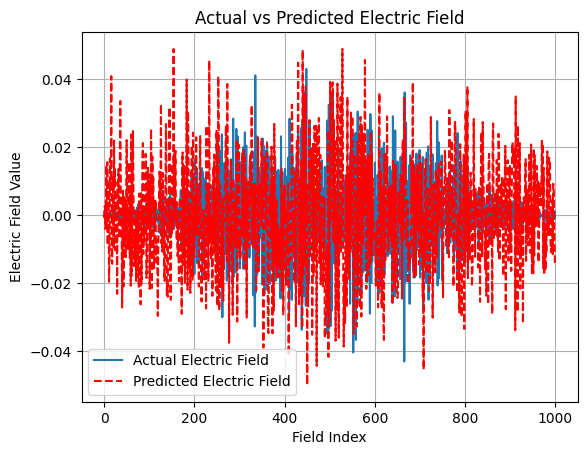

In [23]:

import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
# Load the array
model = load_model("best_model.h5")
with open(r"C:\Users\dilip\OneDrive\Desktop\MTP\output\char_electric_field_188.pkl", 'rb') as file:
    actual_field = pickle.load(file)
    

with open(r"C:\Users\dilip\OneDrive\Desktop\MTP\input\input188.pkl", 'rb') as file:
    input_ = pickle.load(file)
# actual_field = outputs[0]  # Example actual field

input_ = np.expand_dims(input_, axis=0)  # Now shape should be (1, 40, 40, 4)

predicted_field = model.predict(input_)  # Predict for the same input
predicted_field=predicted_field[::-1]
# plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot actual field
plt.plot(actual_field, label='Actual Electric Field')

# Plot predicted field with a different color and style
plt.plot(predicted_field[0], label='Predicted Electric Field', linestyle='--', color='red')

plt.xlabel('Field Index')
plt.ylabel('Electric Field Value')
plt.title('Actual vs Predicted Electric Field')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
(inputs[0:1])[0].shape

In [ ]:
input_ .shape

In [ ]:
plt.plot(actual_field, label='Actual Electric Field')

In [ ]:
predicted_field.shape

In [ ]:
model.summary()

In [ ]:
predicted_field = predicted_field.squeeze()

In [ ]:
plt.plot(predicted_field[0])

In [ ]:
plt.plot(actual_field)

In [ ]:
actual_field.shape

In [ ]:
predicted_field.shape